<a href="https://colab.research.google.com/github/jbajaj1/faketweets/blob/master/faketweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import torch
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import torch.nn as nn
import torch.utils.data as data
import handleTwitterSent as TS
from torch.utils.data import TensorDataset, DataLoader

In [13]:
twitterVoc = TS.Vocab("twitter")

#Put proper location of file here
tokenizedTweets, tokenizedLabels = TS.load_tweets("../twitter_sentiment/semeval_train_trimmed.txt", Voc=twitterVoc, initVoc=True)

print(twitterVoc.to_word(4))
print(twitterVoc.to_index("this"))

print(twitterVoc.num_words)

beiber
248
25574


In [14]:
ourLSTM = TS.LSTM(twitterVoc.num_words, 64, 64)

In [17]:
##################
#####Training#####
##################

opt = torch.optim.Adam(ourLSTM.parameters(), lr=.1)
loss = torch.nn.CrossEntropyLoss()
epochs = 100
dataset = DataLoader(TensorDataset(tokenizedTweets, tokenizedLabels), batch_size=100)
for i in range(epochs):
    print("Training on epoch", i)
    for batchidx, (x, y) in enumerate(dataset):
        opt.zero_grad()
        outputs = ourLSTM(x)
        lossVal = loss(outputs, y)
        lossVal.backward()
        opt.step()

Training on epoch 0
Training on epoch 1
Training on epoch 2
Training on epoch 3
Training on epoch 4
Training on epoch 5
Training on epoch 6
Training on epoch 7
Training on epoch 8
Training on epoch 9
Training on epoch 10
Training on epoch 11
Training on epoch 12
Training on epoch 13
Training on epoch 14
Training on epoch 15
Training on epoch 16
Training on epoch 17
Training on epoch 18
Training on epoch 19
Training on epoch 20
Training on epoch 21
Training on epoch 22
Training on epoch 23
Training on epoch 24
Training on epoch 25
Training on epoch 26
Training on epoch 27
Training on epoch 28
Training on epoch 29
Training on epoch 30
Training on epoch 31
Training on epoch 32
Training on epoch 33
Training on epoch 34
Training on epoch 35
Training on epoch 36
Training on epoch 37
Training on epoch 38
Training on epoch 39
Training on epoch 40
Training on epoch 41
Training on epoch 42
Training on epoch 43
Training on epoch 44
Training on epoch 45
Training on epoch 46
Training on epoch 47
Tr

Results for semeval_train_dev.txt
Precision: 0.4525377760557923
[[  7 245 127]
 [ 20 821 372]
 [ 18 631 340]]



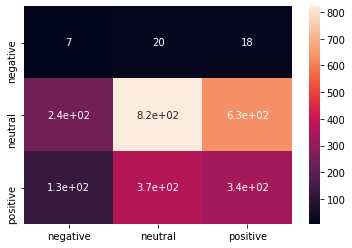

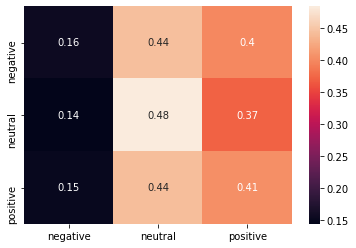

Num Unknown Words: 31752


In [20]:
##################
#####Predict######
####Evaluation####
##################
import seaborn as sn
from matplotlib import pyplot as plt

%matplotlib inline



#with torch.no_grad():
#    predVal = ourLSTM(tokenizedTweets).argmax(dim=-1)

#pres, conf = TS.validate(tokenizedLabels, predVal)
#print(f'Results for Train Data:\nPrecision: {pres}\n{conf}\n')


filelist = ["semeval_train_dev.txt"]

for file in filelist:
    #Update file location here
    tokTestTweets, tokTestLabels = TS.load_tweets("../twitter_sentiment/" + file, twitterVoc)
    with torch.no_grad():
        predVal = ourLSTM(tokTestTweets).argmax(dim=-1)
    pres, conf = TS.validate(tokTestLabels, predVal)
    print(f'Results for {file}\nPrecision: {pres}\n{conf}\n')
    conf = conf.T
    #Counts graph
    sn.heatmap(conf, annot=True, xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
    plt.show()
    #Percentages graph
    sn.heatmap(conf/conf.sum(1, keepdims=True), annot=True, xticklabels=["negative", "neutral", "positive"], yticklabels=["negative", "neutral", "positive"])
    plt.show()


print("Num Unknown Words:", twitterVoc.unknown_count)
